# __Humidity Predictor__

In [1]:
import glob, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Training files
files = glob.glob('../data/WHT_data/WHT_weather_set_parts_*')
files = sorted(files)
WHT_parts = [pd.read_csv(file_path) for file_path in files]

# Concatenate the DataFrames into a single training set
WHT_data = pd.concat(WHT_parts, ignore_index=True)

/tmp/ipykernel_26079/3604653322.py:6: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_26079/3604653322.py:6: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_26079/3604653322.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_26079/3604653322.py:6: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_26079/3604653322.py:6: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for fi

In [2]:
WHT_data['sampletime'] = pd.to_datetime(WHT_data['sampletime'])

# Extract year
WHT_data['year'] = WHT_data['sampletime'].dt.year

# Extract month
WHT_data['month'] = WHT_data['sampletime'].dt.month

# Extract day
WHT_data['day'] = WHT_data['sampletime'].dt.day

# Extract hour
WHT_data['hour'] = WHT_data['sampletime'].dt.hour

# Extract minute
WHT_data['minute'] = WHT_data['sampletime'].dt.minute

# Extract second
WHT_data['second'] = WHT_data['sampletime'].dt.second

# Drop the 'sampletime' column
WHT_data.drop(columns=['sampletime'], inplace=True)

WHT_data.head()

,windspeed,airtemperature,relativehumidity,localwetness,localbattery,winddirection,airpressure,dewpoint,year,month,day,hour,minute,second
0,7.1742,9.3159,32.342,-0.025,11.995,NaN,NaN,NaN,2020,1,31,16,59,31
1,6.7829,9.322,32.324,-0.025,11.994,NaN,NaN,NaN,2020,1,31,16,59,37
2,7.0003,9.3159,32.36,-0.025,11.995,NaN,NaN,NaN,2020,1,31,16,59,43
3,7.2612,9.3159,32.434,-0.025,11.994,NaN,NaN,NaN,2020,1,31,16,59,49
4,6.9134,9.3159,32.489,-0.025,11.994,NaN,NaN,NaN,2020,1,31,16,59,55


In [3]:
# Convert the numeric values into float32
# We need to convert each category into float32
columns = WHT_data.columns

# There are some missing values with '\\N' in the variables. Let's transform into an arbitrary number
for ii in columns:
    WHT_data[ii][WHT_data[ii] == '\\N'] = -1
    # Converting into float32
    WHT_data[ii] = WHT_data[ii].astype('float32')

# Displaying the type of each column
print(WHT_data.dtypes)
print('\n')

# Now we can count the number of NaNs in each category
print(WHT_data.isna().sum())

/tmp/ipykernel_26079/2924672293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_26079/2924672293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_26079/2924672293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_26079/2924672293.py:7: SettingWithCopyWarning: 
A

windspeed           float32
airtemperature      float32
relativehumidity    float32
localwetness        float32
localbattery        float32
winddirection       float32
airpressure         float32
dewpoint            float32
year                float32
month               float32
day                 float32
hour                float32
minute              float32
second              float32
dtype: object


windspeed                 0
airtemperature            0
relativehumidity          0
localwetness        6334884
localbattery        6334884
winddirection       5557582
airpressure         5557582
dewpoint            5557582
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64


/tmp/ipykernel_26079/2924672293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_26079/2924672293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_26079/2924672293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_26079/2924672293.py:7: SettingWithCopyWarning: 
A

In [4]:
# Deleting the columns with more than 30% of NaNs

dim = len(WHT_data) # Dimension of the DataFrame

for ii in columns:
    nans = WHT_data[ii].isna().sum()*100/dim
    # Applying the condition over the column
    if nans > 30:
        WHT_data.drop(ii, axis=1, inplace=True)

In [5]:
# Constraining to data from 2023 for better performance as the whole data devours my RAM...
WHT_data = WHT_data[WHT_data.year >= 2023]

## Data Visualization

#### Mean temperature, humidity and wind speed by month

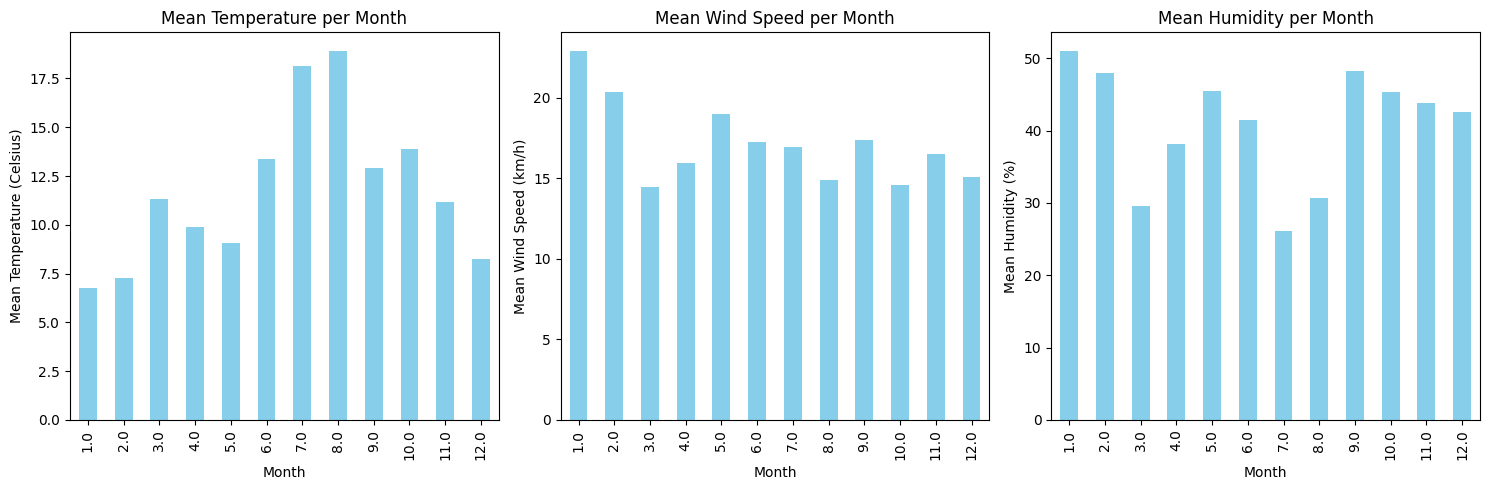

In [6]:
# Group by month and calculate mean temperature
mean_temp_per_month = WHT_data.groupby('month')['airtemperature'].mean()
mean_wind_per_month = WHT_data.groupby('month')['windspeed'].mean()
mean_humi_per_month = WHT_data.groupby('month')['relativehumidity'].mean()

fig, ax = plt.subplots(1,3,figsize=(15,5))
ax = ax.ravel()

# Plotting the mean temperature per month
mean_temp_per_month.plot(kind='bar', color='skyblue', ax=ax[0])
mean_wind_per_month.plot(kind='bar', color='skyblue', ax=ax[1])
mean_humi_per_month.plot(kind='bar', color='skyblue', ax=ax[2])

ax[0].set_title('Mean Temperature per Month'); ax[1].set_title('Mean Wind Speed per Month'); ax[2].set_title('Mean Humidity per Month')
ax[0].set_xlabel('Month'); ax[1].set_xlabel('Month'); ax[2].set_xlabel('Month')
ax[0].set_ylabel('Mean Temperature (Celsius)'); ax[1].set_ylabel('Mean Wind Speed (km/h)'); ax[2].set_ylabel('Mean Humidity (%)')
#plt.xticks(rotation=45, ax=ax[0])  # Rotate x-axis labels for better readability
#ax[0].set_grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Correlation map

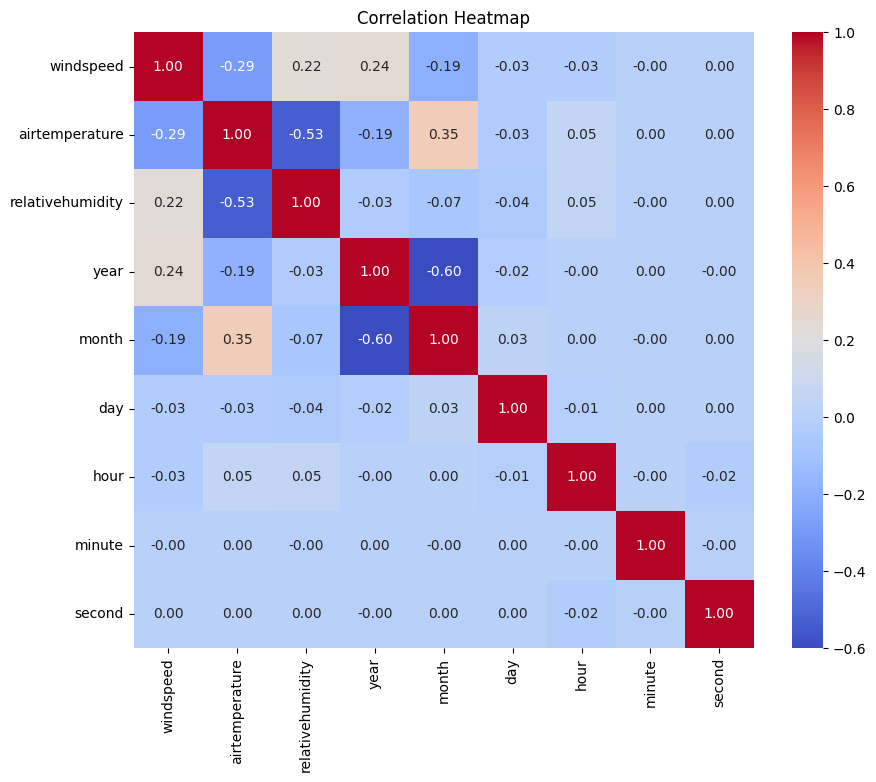

In [7]:
# Assuming combined is your DataFrame
correlation_matrix = WHT_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Discarding the variables with very small correlation close to 0 (or equal to 0)
WHT_data.drop(['second', 'minute'], axis=1, inplace=True)

## Machine Learning models

In [9]:
from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
target = WHT_data.relativehumidity
data   = WHT_data.drop(columns='relativehumidity')

In [11]:
scaler = preprocessing.MinMaxScaler().fit(data)
data[data.columns] = pd.DataFrame(scaler.transform(data), index= data.index)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state= 101)

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, random_state=0, n_jobs=10)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

### Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression(X_train, y_train, X_test, y_test, degree):
    # Transformación polinómica de los conjuntos de entrenamiento y prueba
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Entrenamiento del modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predicciones en los conjuntos de entrenamiento y prueba
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Cálculo de las métricas
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    return mae_train, mae_test, mse_train, mse_test, r2_train, r2_test
    
# Lista de grados del polinomio a probar
degrees = range(1, 8)  # Puedes ajustar este rango según lo desees

# Listas para almacenar las métricas
mse_train_list = []
mae_train_list = []
r2_train_list = []

for degree in degrees:
    # Llamada a la función para cada grado del polinomio
    mae_train, _, mse_train, _, r2_train, _ = polynomial_regression(X_train, y_train, X_test, y_test, degree)
    mse_train_list.append(mse_train)
    r2_train_list.append(r2_train)

# Graficar MSE
plt.plot(degrees, mse_train_list, label='MSE', marker='o')
plt.xlabel('Grado del polinomio')
plt.ylabel('MSE')
plt.title('MSE para distintos grados del polinomio')
plt.legend()
plt.show()

# Graficar MAE
plt.plot(degrees, mae_train_list, label='MAE', marker='o')
plt.xlabel('Grado del polinomio')
plt.ylabel('MAE')
plt.title('MAE para distintos grados del polinomio')
plt.legend()
plt.show()

# Graficar R2
plt.plot(degrees, r2_train_list, label='R2', marker='o')
plt.xlabel('Grado del polinomio')
plt.ylabel('R2')
plt.title('R2 para distintos grados del polinomio')
plt.legend()
plt.show()

### Dense Neural Network

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Design the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Re-scaling also the target variable for performance imrpovements
# Crear y ajustar el MinMaxScaler para la variable objetivo
scaler_y = preprocessing.MinMaxScaler()

# Training set
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Train the model
history = model.fit(X_train, y_train_scaled, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test_scaled)
print("Mean Squared Error (MSE):", loss)
print("Mean Absolute Error (MAE):", mae)

Epoch 1/20
31658/31658 [==============================] - 24s 748us/step - loss: 0.0166 - mae: 0.0925 - val_loss: 0.0097 - val_mae: 0.0701
Epoch 2/20
31658/31658 [==============================] - 24s 744us/step - loss: 0.0082 - mae: 0.0642 - val_loss: 0.0070 - val_mae: 0.0598
Epoch 3/20
31658/31658 [==============================] - 24s 754us/step - loss: 0.0063 - mae: 0.0559 - val_loss: 0.0062 - val_mae: 0.0553
Epoch 4/20
31658/31658 [==============================] - 24s 754us/step - loss: 0.0053 - mae: 0.0510 - val_loss: 0.0047 - val_mae: 0.0487
Epoch 5/20
31658/31658 [==============================] - 24s 744us/step - loss: 0.0047 - mae: 0.0480 - val_loss: 0.0045 - val_mae: 0.0469
Epoch 6/20
31658/31658 [==============================] - 24s 743us/step - loss: 0.0043 - mae: 0.0457 - val_loss: 0.0039 - val_mae: 0.0432
Epoch 7/20
31658/31658 [==============================] - 24s 751us/step - loss: 0.0039 - mae: 0.0438 - val_loss: 0.0038 - val_mae: 0.0427
Epoch 8/20
31658/31658 [===

9894/9894 [==============================] - 4s 431us/step


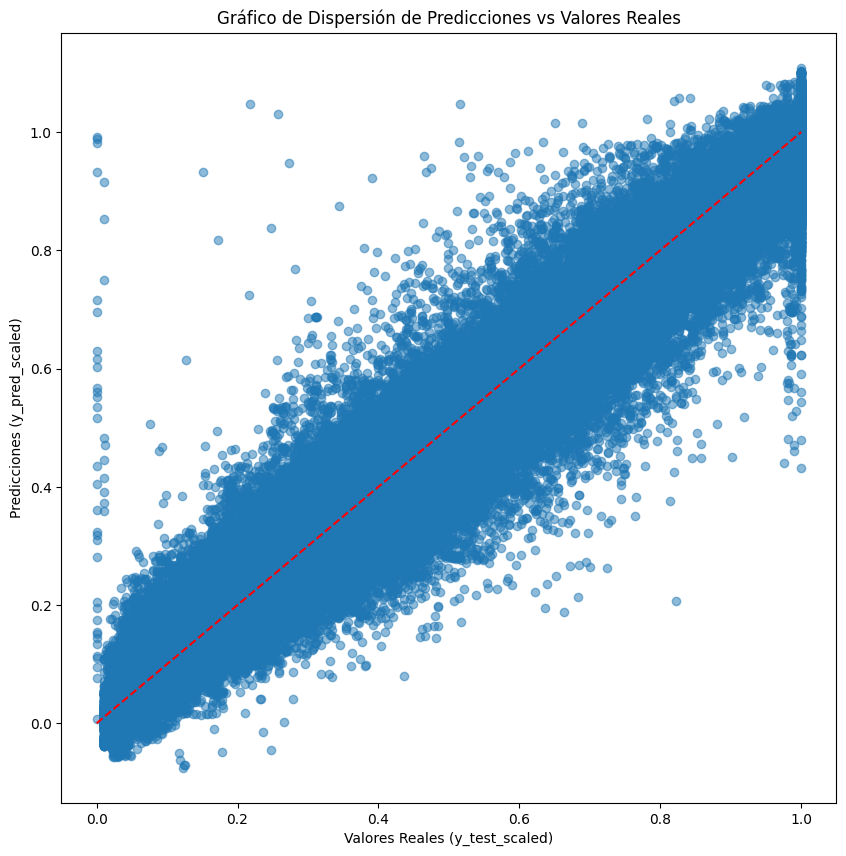

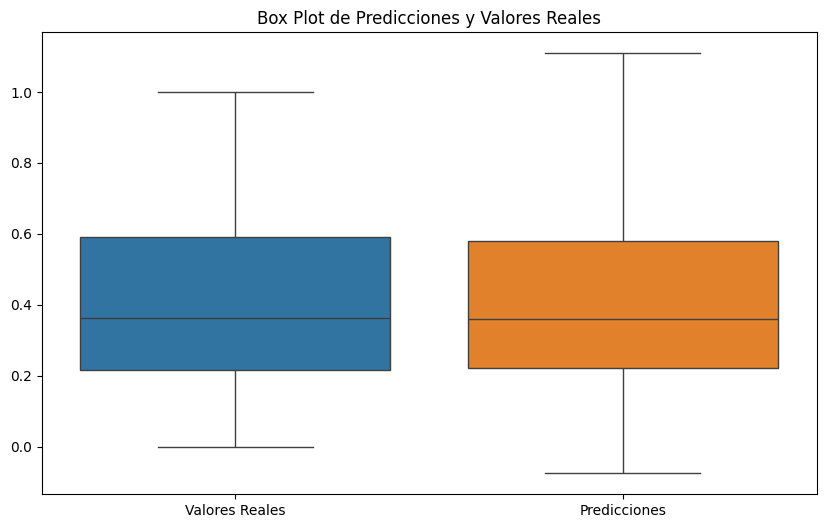

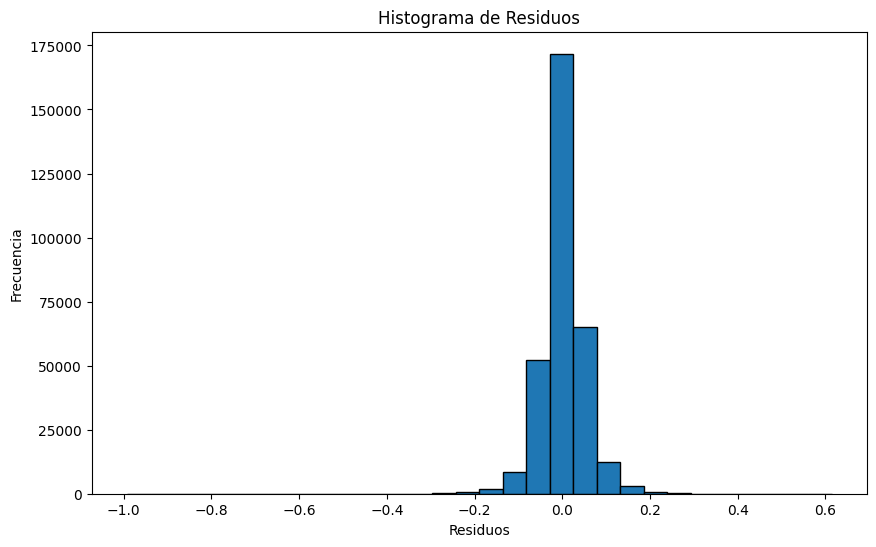

In [26]:
# Applying the DNN over the testing set
y_pred = model.predict(X_test)

# Gráfico de dispersión
plt.figure(figsize=(10,10))
plt.scatter(y_test_scaled, y_pred, alpha=0.5)
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], color='red', linestyle='--')
plt.xlabel('Valores Reales (y_test_scaled)')
plt.ylabel('Predicciones (y_pred_scaled)')
plt.title('Gráfico de Dispersión de Predicciones vs Valores Reales')
plt.show()

# Boxplot de datos predecidos vs datos reales
import seaborn as sns

# Crear un DataFrame para las comparaciones
df_comparacion = pd.DataFrame({
    'Valores Reales': y_test_scaled.flatten(),
    'Predicciones': y_pred.flatten()
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_comparacion)
plt.title('Box Plot de Predicciones y Valores Reales')
plt.show()

residuos = y_test_scaled - y_pred

# Histograma de residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()